--- Dataset Information (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  obje

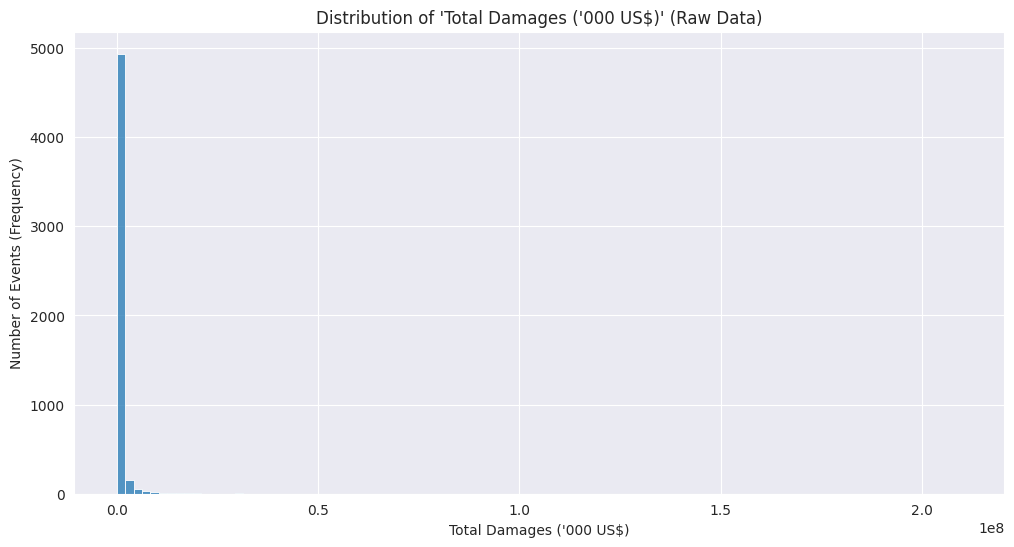

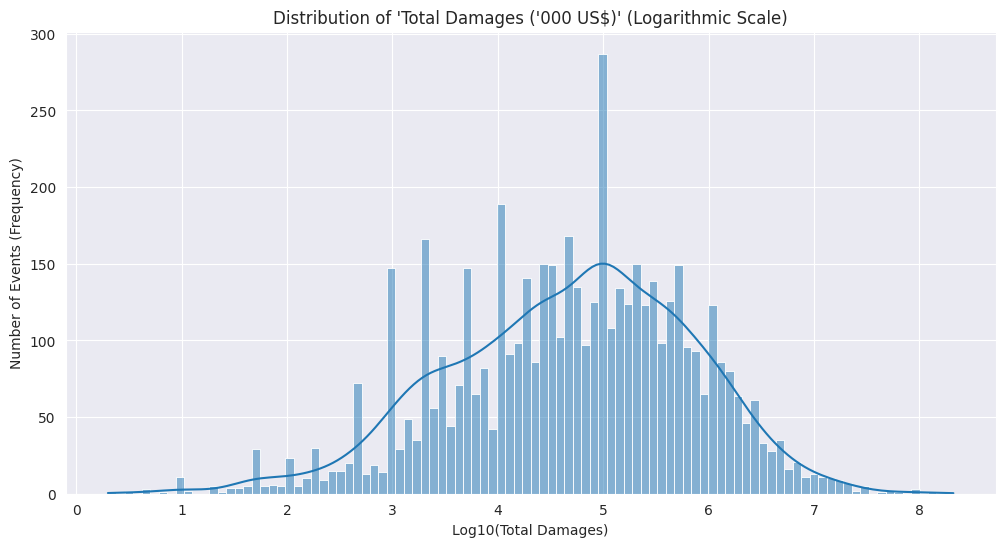

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # <-- CORRECTION 1: Explicitly importing NumPy.

# Load the dataset
try:
    df = pd.read_csv("../1900_2021_DISASTERS.xlsx - emdat data.csv")
except FileNotFoundError:
    print("File not found. Please check the file name.")
    # Stop here if necessary

print("--- Dataset Information (df.info()) ---")
print(df.info())
print("\n" + "="*50 + "\n")

# Define our Target Variable
target_col = "Total Damages ('000 US$)" #

# 1. Missing Data Analysis of the Target Variable
print(f"--- Target Variable Analysis: '{target_col}' ---")
missing_percentage = df[target_col].isnull().mean() * 100
print(f"Missing data ratio in the target variable (Total Damages): {missing_percentage:.2f}%")
print("\n")

# 2. Statistical Analysis of the Target Variable
# Get statistics only on non-NaN values
print(f"--- Target Variable Statistics (Non-NaN) ---")
print(df[target_col].describe())
print("\n")

# 3. Distribution Analysis of the Target Variable (Visualization)
# Since there might be very large or small values, let's first get non-NaN values
valid_damages = df[target_col].dropna()

# Look at the raw data
plt.figure(figsize=(12, 6))
sns.histplot(valid_damages, bins=100, kde=False)
plt.title(f"Distribution of '{target_col}' (Raw Data)")
plt.xlabel("Total Damages ('000 US$)")
plt.ylabel("Number of Events (Frequency)")
plt.show()

# If the distribution is highly skewed, looking at it on a logarithmic scale is more meaningful
# Let's take values greater than 0
positive_damages = valid_damages[valid_damages > 0]

# <-- CORRECTION 2: Using vectorized np.log10() instead of .apply()
plt.figure(figsize=(12, 6))
sns.histplot(np.log10(positive_damages), bins=100, kde=True)
plt.title(f"Distribution of '{target_col}' (Logarithmic Scale)")
plt.xlabel("Log10(Total Damages)")
plt.ylabel("Number of Events (Frequency)")
plt.show()